<b>NumPy</b> and <b>Pandas</b> simplify analyzing and manipulating data  
<b>Matplotlib</b> provides attractive data visualizations  
<b>Scikit-learn</b> offers simple and effective predictive data analysis  
<b>TensorFlow</b> and <b>PyTorch</b> supply machine learning and deep learning capabilities

How to parse the dates at the time of loading data  
<code> df = pandas.read_csv('data.csv', parse_dates=['date'])</code>

Filter the data based on the date  
* <code>df = df[[d.month == 1 for d in df.date]].copy()</code>  
fetch only the january month data  
* <code>df = df[[d.month < 7 for d in df.date]].copy()</code>  
fetch only the 1 to 6 months data

club the yearly data into a fraction of day of year from a specific date  
<code>df["years_since_1990"] = [(d.year + d.timetuple().tm_yday / 365.25) - 1990 for d in df.date]</code>

<b>Normalize</b> scale and offset the data column  
<code>df["normalised_temperature"] = (df["min_temperature"] - np.mean(df["min_temperature"])) / np.std(df["min_temperature"])</code>

To show the march $1^{st}$ of 1990  
<code>from datetime import datetime  
print(datetime(1990,3,1)) # yyyy,mm,dd</code>

Filter data based on list of dates  
<code>desired_dates = [  
    datetime(1950,2,1),  
    datetime(1960,2,1),  
    datetime(1970,2,1),  
    datetime(1980,2,1),  
]  
  
df = df[df.date.isin(desired_dates)].copy()</code>

Find the missing data

[titanic data](https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/titanic.csv)

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', index_col=False, sep=",", header=0)
missing_data = df.isnull().sum().to_frame()  
missing_data = missing_data.rename(columns={0:'Empty Cells'})  
print(missing_data)

             Empty Cells
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                  177
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                687
Embarked               2


In [5]:
# records which are having missing values
df[df.isna().any(axis=1)]
# for simplicity lets consider only missing values in Embarked
df[df.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [2]:
# info of about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


here numerical types are  
int64, float64  
categorical types are  
object

<AxesSubplot:>

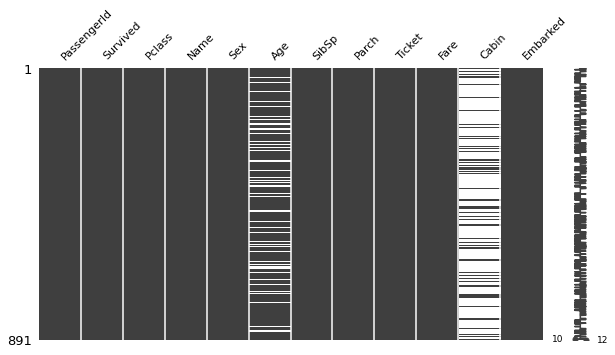

In [3]:
import missingno as msno
msno.matrix(df, figsize=(10,5), fontsize=11)

In [4]:
# combine two or more filter conditions

missing_age = df["Age"].isnull()
missing_cabin = df["Cabin"].isnull()
unknown_age_and_cabin = df[missing_age & missing_cabin].copy()

In [6]:
# drop columns from data, axis=1
df = df.drop(["PassengerId", "Name", "Ticket"], axis=1)

#### Option 1  
drop the missing data

In [9]:
# removing all the records which are having aleast one null value
df.dropna(axis=0,how='any').shape

(183, 12)

In [5]:
# remove the records which are having Embarked column as null values
clean_dataset = df.dropna(subset=["Embarked"]).copy()
clean_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Option 2  
impute the missing data with mean


In [6]:
# calculate the mean of numerical data only for those where the Age>0
# cause there may be the null values which are recorded as the 0
# these 0 valued records will effect the mean of the data

mean_age = clean_dataset[clean_dataset.Age>0]['Age'].mean()
clean_dataset["Age"] = clean_dataset["Age"].fillna(mean_age).replace({0:mean_age})

#### Option 3  
Assign a new category to unknown categorical data

In [7]:
# Assign unknow to records where "Cabin" is empty
clean_dataset["Cabin"] = clean_dataset["Cabin"].fillna("Unknown")

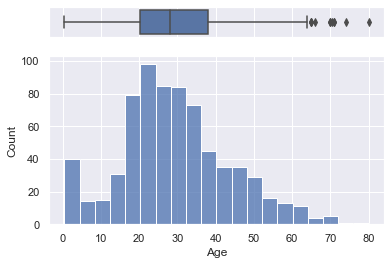

In [3]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
# df = sns.load_dataset("iris")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(x=df["Age"], ax=ax_box)
sns.histplot(data=df,x="Age", ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

In [4]:
import plotly.express as px
fig = px.histogram(df, x="Age", y="Survived", histfunc='avg', marginal = 'box')
fig.show()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

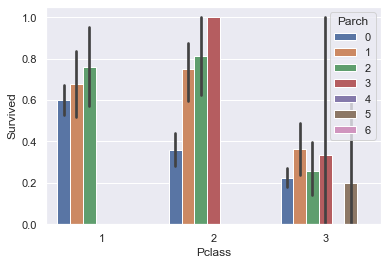

In [10]:
sns.barplot(data=clean_dataset,x="Pclass",y='Survived',hue="Parch")

In [5]:
fig = px.histogram(df, x="Pclass", y="Survived", histfunc='avg',color="Parch")
fig.update_layout(barmode='group')
fig.show()

<AxesSubplot:xlabel='Pclass', ylabel='SibSp'>

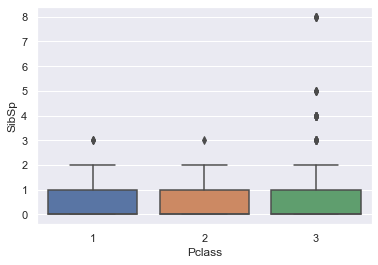

In [12]:
sns.boxplot(data=clean_dataset,x="Pclass",y="SibSp")

In [13]:
fig = px.box(data_frame=clean_dataset,x="Pclass",y="SibSp")
fig.show()

<AxesSubplot:xlabel='Age', ylabel='Fare'>

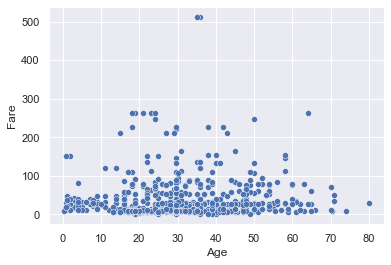

In [14]:
sns.scatterplot(data=clean_dataset,x="Age",y="Fare")

In [15]:
fig = px.scatter(data_frame=clean_dataset,x="Age",y="Fare")
fig.show()

In [16]:
clean_dataset['total']=1
fig = px.sunburst(clean_dataset, path=['Pclass','Sex','Survived','Embarked'], values='total')
fig.show()

In [17]:
import numpy as np
table = df.groupby(['Embarked','Sex'])['Survived'].agg([np.mean,'count']).reset_index().copy()
table.columns = table.columns.map({'Embarked':'Port','Sex':'Sex','mean':'Survival_rate','count':'Passenger_count'})
# table
fig = px.scatter(data_frame=table,x='Sex',y='Port',size='Passenger_count',size_max=80,color='Survival_rate')
fig.show()

## Feature engineering  
### one-hot encoding or dummy variables  
Find out which categorical variables will add value to model  
We can find these cat-columns by a simple procedure  
* get all the numerical variables in dataset and find log-loss w.r.t o/p  
* now try adding one of the cat-column in one-hot form and find log-loss  
* if the log-loss decreases then that cat-column adds value to model  
* if not then it is not adding value to o/p

In [7]:
df = df.dropna(subset=["Age"]).copy()

In [11]:
# calculating the logistic regression loss
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
features = ["Age", "Pclass", "SibSp", "Parch", "Fare"] 
X = df[features]
y = df.Survived
model = LogisticRegression(random_state=0, max_iter=2000).fit(X, y)
# calculate loss
probabilities = model.predict_proba(df[features])
loss = metrics.log_loss(df.Survived, probabilities)
loss

0.5708751873549369

In [8]:
# creating function for loss calculation
import pandas as pd
from typing import List
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, model_selection
def titanic_log_loss(all_data:pd.DataFrame,features:List[str]):
    # splitting data into train an test datasets
    train, test = model_selection.train_test_split(all_data,test_size=0.3, random_state=0)
    X = train[features]
    y = train.Survived
    model =  LogisticRegression(random_state=0, max_iter=2000).fit(X, y)
    # calculate loss
    probabilities = model.predict_proba(test[features])
    loss = metrics.log_loss(test.Survived, probabilities)
    return loss

In [25]:
# only numerical data loss
features = ["Age", "Pclass", "SibSp", "Parch", "Fare"] 
numeric_loss = titanic_log_loss(df,features)
numeric_loss

0.5983936612258052

numerical log-loss

In [26]:
# adding cat-variable Sex as binary
df['IsFemale'] = df['Sex'].replace({'male':0,'female':1})
features = ["Age", "Pclass", "SibSp", "Parch", "Fare", 'IsFemale']
loss_Binary_category = titanic_log_loss(df,features)
loss_Binary_category

0.44813325444268254

$\implies$ It reduced the log loss then this variable is important

In [27]:
# converting cat-variable Pclass into one-hot
print(df['Pclass'].unique())
pclass_one_hot = pd.get_dummies(df, columns=['Pclass'],drop_first=False).copy()
pclass_one_hot['Pclass'] = df.Pclass
print(pclass_one_hot.columns)

features = ["Age", "SibSp", "Parch", "Fare", 'IsFemale', 'Pclass_1', 'Pclass_2', 'Pclass_3']
loss_pclass_categorical = titanic_log_loss(pclass_one_hot,features)
loss_pclass_categorical

[3 1 2]
Index(['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked',
       'IsFemale', 'Decks', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Pclass'],
      dtype='object')


0.44887192799227477

$\implies$ It slightly worsen the model

In [51]:
print(f"distinct cabins: {len(df['Cabin'].unique())}")
df['Cabin'].unique()

distinct cabins: 135


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'D33', 'B30', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'D47', 'B86',
       'F2', 'C2', 'B19', 'A7', 'C49', 'F4', 'B4', 'B80', 'A31', 'D36',
       'D15', 'C93', 'C78', 'D35', 'C87', 'B77', 'E67', 'B94', 'C125',
       'C99', 'C118', 'D7', 'B49', 'D', 'C22 C26', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'E33', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'C52',
       'E44', 'A34', 'C104', 'C111', 'C92', 'E38', 'E12', 'E63', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',
       'C90', 'C126', 'C45', 'E8', 'B101', 'C46', 'D30', 'E121', 'D11',
       'E

In [28]:
Cabin_one_hot = pd.get_dummies(df,columns=['Pclass','Cabin'],drop_first=False).copy()
cab_col = list(x for x in Cabin_one_hot.columns if x.startswith('Cabin_'))
features = ["Age", "SibSp", "Parch", "Fare", 'IsFemale', 'Pclass_1', 'Pclass_2', 'Pclass_3']+cab_col
loss_cabin_categorical = titanic_log_loss(Cabin_one_hot,features)
loss_cabin_categorical

0.4423549981081906

$\implies$ It is the best score so far

In genereal having large number of columns doesn't always do good for the model, lets try to reduces these number of columns  
by considering only the decks instead of all cabins  

In [17]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       529
Embarked      2
IsFemale      0
dtype: int64

In [18]:
df['Cabin'] = df['Cabin'].fillna('Unknown')

In [29]:
df['Decks'] = df.Cabin.apply(lambda c: c[0])
print(f"Decks: {df['Decks'].unique()}")
decks_one_hot = pd.get_dummies(df,columns=['Pclass','Decks'],drop_first=False)
deck_col = list(c for c in decks_one_hot.columns if c.startswith('Decks_'))
features = ["Age", "SibSp", "Parch", "Fare", 'IsFemale', 'Pclass_1', 'Pclass_2', 'Pclass_3']+deck_col
loss_deck_categorical = titanic_log_loss(decks_one_hot,features)
loss_deck_categorical

Decks: ['U' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


0.444756564287514

Comparing all the models

In [30]:
list = [['Numeric features only ',numeric_loss],
        ['Adding Sex as Binary',loss_Binary_category],
        ['Pclass as Binary',loss_pclass_categorical],
        ['Using Cabin as Categorical',loss_cabin_categorical],
        ['Using Deck as instead of Cabin',loss_deck_categorical]]
pd.DataFrame(list,columns=['Dataset','Log-Loss (Low is better)'])

,Dataset,Log-Loss (Low is better)
0,Numeric features only,0.598394
1,Adding Sex as Binary,0.448133
2,Pclass as Binary,0.448872
3,Using Cabin as Categorical,0.442355
4,Using Deck as instead of Cabin,0.444757


In [15]:
df_students = pd.read_csv('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv',delimiter=',',header='infer')

In [12]:
# the mean grades of students whose grades are above average
mean_study = df_students['StudyHours'].mean()
df_students[df_students.StudyHours > mean_study].Grade.mean()

66.7

In [16]:
# Adding Pass column: passing grade is 60
passes  = pd.Series(df_students['Grade'] >= 60)
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)

df_students.head()

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False


In [17]:
# now calculating the pass and fail counts
df_students.groupby('Pass')['Name'].count()

Pass
False    17
True      7
Name: Name, dtype: int64

In [21]:
# finding relation between Pass, Studyhours and Grade
df_students.groupby('Pass')['StudyHours','Grade'].mean()

C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,StudyHours,Grade
Pass,,
False,8.734375,38.000000
True,14.250000,73.142857


In [24]:
# Sorting based on the Grades
df_students.sort_values('Grade',ascending=False).head()

,Name,StudyHours,Grade,Pass
3,Rosie,16.0,97.0,True
10,Francesca,15.5,82.0,True
9,Giovanni,14.5,74.0,True
14,Jenny,15.5,70.0,True
21,Aisha,12.0,64.0,True


In [25]:
# clean the data
df_students = df_students.dropna(axis=0,how='any')

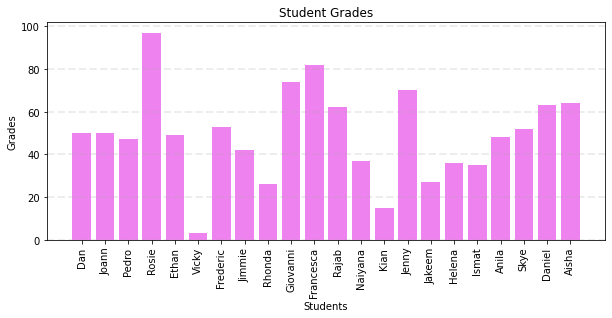

In [44]:
# bar plot of Name vs Grade
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,4))
plt.bar(x='Name',height='Grade',data=df_students, color='violet')

plt.title('Student Grades')
plt.xlabel('Students')
plt.ylabel('Grades')
plt.grid(axis='y',alpha=0.2,linestyle='--',linewidth='2',color='#AEA9A8')
plt.xticks(rotation=90)

plt.show()

C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


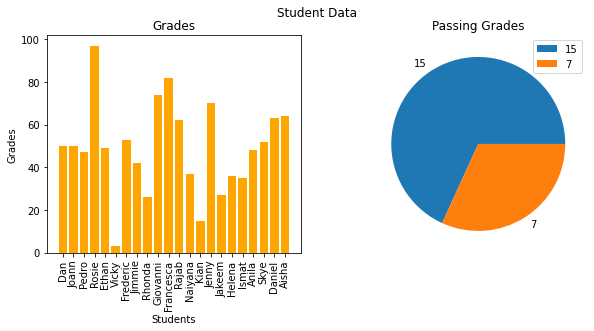

In [111]:
fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].bar(x='Name',height='Grade',data=df_students,color='orange')
ax[0].set_title('Grades')
ax[0].set_xlabel('Students')
ax[0].set_ylabel('Grades')
ax[0].set_xticklabels(df_students.Name,rotation=90)

passing_count = df_students.Pass.value_counts()
ax[1].pie(passing_count,labels=passing_count)
ax[1].set_title('Passing Grades')
ax[1].legend(passing_count)

fig.suptitle('Student Data')

plt.show()

Minimum: 3.00
Mean: 49.18
Median: 49.50
Mode: 50.00
Max: 97.00


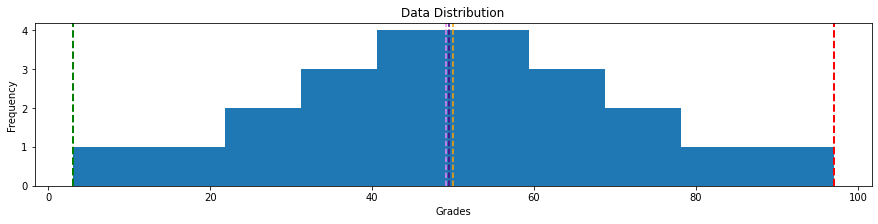

In [136]:
var_data = df_students.Grade

min_value = var_data.min()
mean_value = var_data.mean()
median_value = var_data.median()
mode_value = var_data.mode()
max_value = var_data.max()

print('Minimum: {:.2f}\nMean: {:.2f}\nMedian: {:.2f}\nMode: {:.2f}\nMax: {:.2f}'.format(\
    min_value,mean_value,median_value,mode_value[0],max_value))

fig = plt.figure(figsize=(15,3))

plt.hist(var_data)

plt.title('Data Distribution')
plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.axvline(mean_value,color='Violet',linestyle='--',linewidth=1.5)
plt.axvline(median_value,color='Indigo',linestyle='--',linewidth=1.5)
plt.axvline(mode_value[0],color='Orange',linestyle='--',linewidth=1.5)
plt.axvline(min_value,color='Green',linestyle='--',linewidth=2)
plt.axvline(max_value,color='Red',linestyle='--',linewidth=2)

plt.show()

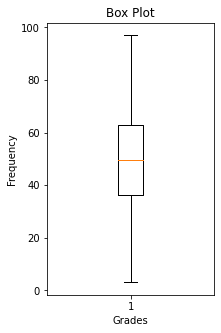

In [135]:
fig = plt.figure(figsize=(3,5))

plt.boxplot(var_data)
plt.title('Box Plot')
plt.ylabel('Frequency')
plt.xlabel('Grades')

plt.show()

Minimum: 3.00
Mean: 49.18
Median: 49.50
Mode: 50.00
Max: 97.00


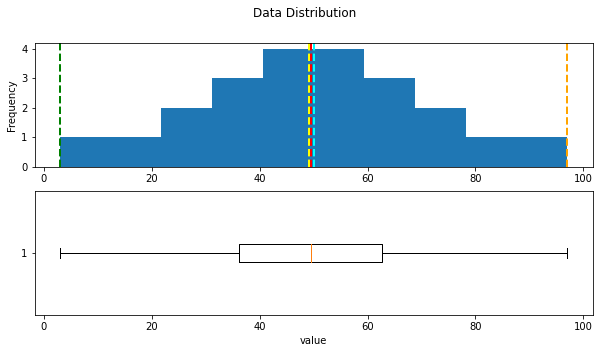

In [159]:
def show_distribution(var_data):
    min_value = var_data.min()
    mean_value = var_data.mean()
    median_value = var_data.median()
    mode_value = var_data.mode()
    max_value = var_data.max()

    print('Minimum: {:.2f}\nMean: {:.2f}\nMedian: {:.2f}\nMode: {:.2f}\nMax: {:.2f}'.format(\
        min_value,mean_value,median_value,mode_value[0],max_value))

    fig,ax = plt.subplots(2,1,figsize=(10,5))

    ax[0].hist(var_data)

    # ax[0].set_title('Data Distribution')
    ax[0].set_ylabel('Frequency')
    ax[0].axvline(mean_value,color='yellow',linestyle='--',linewidth=2)
    ax[0].axvline(median_value,color='red',linestyle='--',linewidth=2)
    ax[0].axvline(mode_value[0],color='cyan',linestyle='--',linewidth=2)
    ax[0].axvline(min_value,color='Green',linestyle='--',linewidth=2)
    ax[0].axvline(max_value,color='orange',linestyle='--',linewidth=2)
    
    ax[1].boxplot(var_data,vert=False)
    ax[1].set_xlabel('value')
    
    fig.suptitle('Data Distribution')

    plt.show()
show_distribution(var_data)

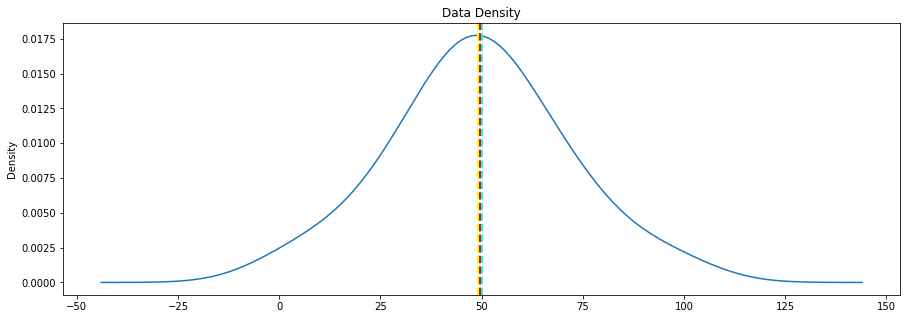

In [160]:
def show_density(var_data):
    fig = plt.figure(figsize=(15,5))

    var_data.plot.density()
    plt.title('Data Density')

    plt.axvline(var_data.mean(),linestyle='--',linewidth=2,color='yellow')
    plt.axvline(var_data.median(),linestyle='--',linewidth=2,color='red')
    plt.axvline(var_data.mode()[0],linestyle='--',linewidth=2,color='cyan')

    plt.show()
show_density(var_data)

Minimum: 1.00
Mean: 10.52
Median: 10.00
Mode: 9.00
Max: 16.00


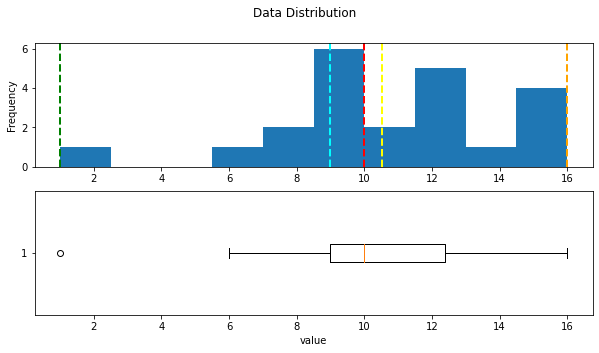

In [161]:
show_distribution(df_students['StudyHours'])

Minimum: 6.00
Mean: 10.98
Median: 10.00
Mode: 9.00
Max: 16.00


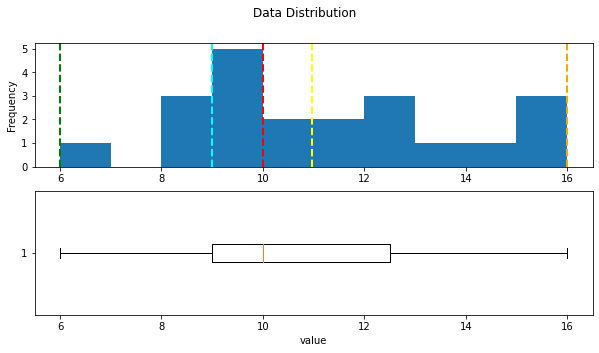

In [162]:
# Students who have studied more than 1 Hour
show_distribution(df_students[df_students['StudyHours']>1]['StudyHours'])

Minimum: 6.00
Mean: 10.98
Median: 10.00
Mode: 9.00
Max: 16.00


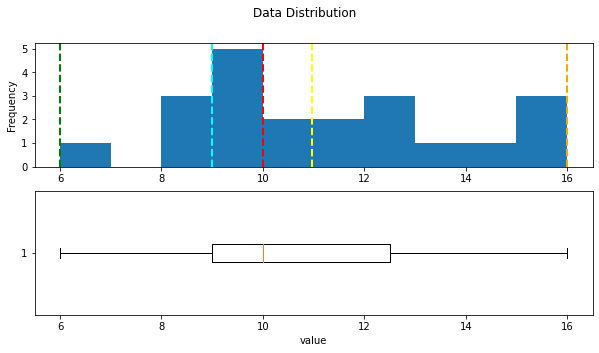

In [163]:
q01 = df_students.StudyHours.quantile(0.01)
show_distribution(df_students[df_students.StudyHours>q01]['StudyHours'])

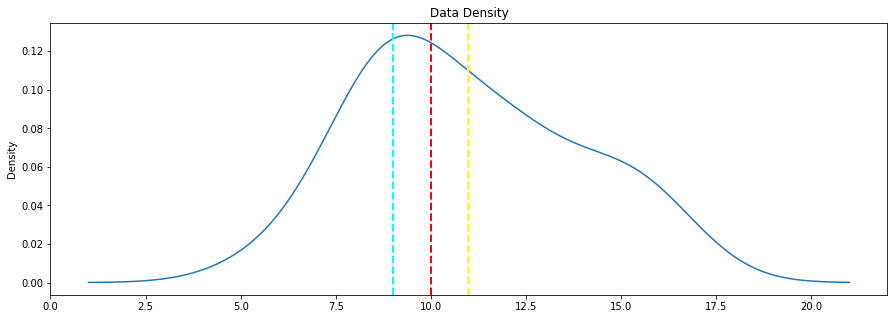

In [164]:
show_density(df_students[df_students.StudyHours>q01]['StudyHours'])

this distribution is called right skewed 

## Measure of Variance  
Calculate:  
    * <i>Range</i> difference between Max and Min  
    * <i>Variance</i>  average of the squared difference of the mean  
    * <i>Standard Deviation</i>  Squared root of Variance

In [171]:
for col_name in ['Grade','StudyHours']:
    col = df_students[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('{}\nRange: {:.2f}\nVariance: {:.2f}\nStandard Deviation: {:.2f}\n'.format(col_name,rng,var,std))

Grade
Range: 94.00
Variance: 472.54
Standard Deviation: 21.74

StudyHours
Range: 15.00
Variance: 12.16
Standard Deviation: 3.49



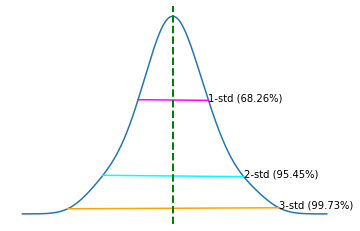

In [186]:
import scipy.stats as stats

fig = plt.figure()
col = df_students['Grade']
col.plot.density()

density = stats.gaussian_kde(col)

mean = df_students['Grade'].mean()
std = df_students['Grade'].std()

x1 = [mean-std, mean+std]
y1 = density(x1)
plt.plot(x1,y1,color='magenta')
plt.annotate('1-std (68.26%)',(x1[1],y1[1]))

x2 = [mean-std*2, mean+std*2]
y2 = density(x2)
plt.plot(x2,y2,color='cyan')
plt.annotate('2-std (95.45%)',(x2[1],y2[1]))

x3 = [mean-std*3, mean+std*3]
y3 = density(x3)
plt.plot(x3,y3,color='orange')
plt.annotate('3-std (99.73%)',(x3[1],y3[1]))

plt.axvline(mean,color='green',linestyle='--',linewidth=2)

plt.axis('off')

plt.show()

## Comparing Data

In [187]:
df_sample = df_students[df_students['StudyHours']>1]

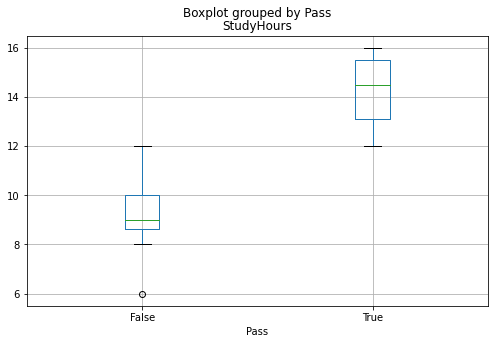

In [192]:
df_sample.boxplot(column='StudyHours',by='Pass',figsize=(8,5))
plt.show()

$\implies$ Students who study longer have higher chances of passing

### Comparing Numericals

<AxesSubplot:xlabel='Name'>

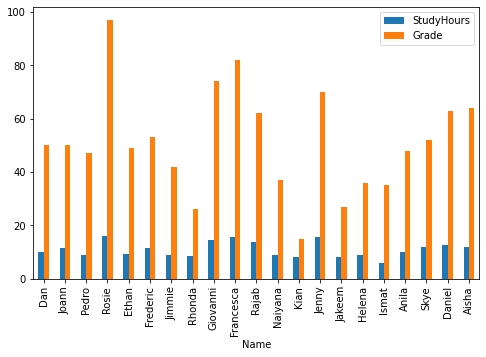

In [197]:
# plt.bar(x='Name',height=['StudyHours','Grade'],data=df_sample)
df_sample.plot(x='Name',y=['StudyHours','Grade'],kind='bar',figsize=(8,5))

$\implies$ its hard to understand the chart as the scales are different

<AxesSubplot:xlabel='Name'>

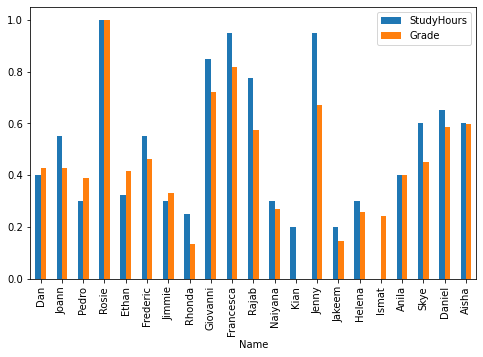

In [198]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_normalized = df_sample[['Name','StudyHours','Grade']].copy()

df_normalized[['StudyHours','Grade']] = scaler.fit_transform(df_normalized[['StudyHours','Grade']])

df_normalized.plot(x='Name',y=['StudyHours','Grade'],kind='bar',figsize=(8,5))


$\implies$ it supports our assumption that the student who study longer acheive higher grades

Lets calculate the correlation between these two columns

In [199]:
df_sample.StudyHours.corr(df_sample.Grade)

0.9117666413789677

Range of corr() is -1 to 1  
1 $\implies$ high +ve correlation  
-1 $\implies$ high -ve correlation  
0 $\implies$ No correlation

Text(0.5, 1.0, 'StdyHours vs Grade')

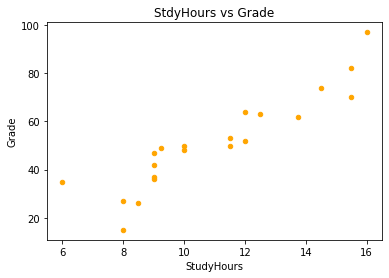

In [208]:
df_sample.plot.scatter(x='StudyHours',y='Grade',color='orange')
plt.title('StdyHours vs Grade')

$\implies$ Positive correlation

Lets try fit a Line to this correlation

slope: 5.77
intercept: -11.52
f(y) = 5.77*x + -11.52


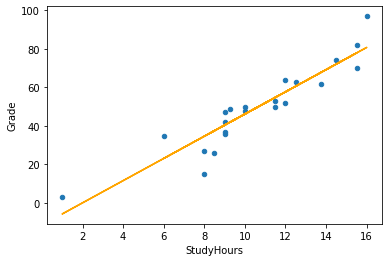

In [219]:
from scipy import stats

df_regression = df_students[['StudyHours','Grade']].copy()

m, b, r, p, se = stats.linregress(df_regression.StudyHours, df_regression.Grade)

print('slope: {:.2f}\nintercept: {:.2f}'.format(m,b))
print('f(y) = {:.2f}*x + {:.2f}'.format(m,b))

df_regression.plot.scatter(x='StudyHours',y='Grade')

x = df_regression.StudyHours
y = m*x + b
plt.plot(x,y,color='orange')

plt.show()

lets calculate the error in the model

In [222]:
df_regression['fx'] = df_regression.StudyHours*m + b
df_regression['error'] = df_regression.fx - df_regression.Grade
df_regression.head()

,StudyHours,Grade,fx,error
0,10.00,50.0,46.166274,-3.833726
1,11.50,50.0,54.819575,4.819575
2,9.00,47.0,40.397406,-6.602594
3,16.00,97.0,80.779481,-16.220519
4,9.25,49.0,41.839623,-7.160377


In [224]:
def f(x,m=m,b=b):
    return m*x + b
#let study time is 14
studytime = 14
prediction = f(studytime)
print('Studying for {} hours per week may result in Grade {:.0f}'.format(studytime,prediction))

Studying for 14 hours per week may result in Grade 69


In [225]:
df = pd.read_csv('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-illness.csv',delimiter='\t')
df.head()

,male,attended_training,age,body_fat_percentage,core_temperature,ate_at_tonys_steakhouse,needed_intensive_care,protein_content_of_last_meal
0,0,1,6.9,38,38.423169,0,0,7.66
1,0,1,5.4,32,39.015998,0,0,13.36
2,1,1,5.4,12,39.148341,0,0,12.90
3,1,0,4.8,23,39.060049,0,0,13.45
4,1,0,4.8,15,38.655439,0,0,10.53


In [238]:
import plotly.express as px
fig = px.box(data_frame=df,x="male",y="core_temperature");fig.show()
fig = px.box(data_frame=df,x="attended_training",y="core_temperature");fig.show()
fig = px.box(data_frame=df,x="ate_at_tonys_steakhouse",y="core_temperature");fig.show()
fig = px.scatter(data_frame=df,x='age',y='core_temperature');fig.show()
fig = px.scatter(data_frame=df,x='body_fat_percentage',y='core_temperature');fig.show()
fig = px.scatter(data_frame=df,x='protein_content_of_last_meal',y='core_temperature');fig.show()